In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#LOADING DATA SET
file_path = '/content/weatherHistory.csv'
df = pd.read_csv(file_path)
df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [ ]:
#DATA PREPORCESSING
# Check for missing values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               1
dtype: int64

In [ ]:
#EXPLORATORY DATA ANALYSIS

# Summary statistics
df.describe()

Temperature (C)  Apparent Temperature (C)     Humidity  \
count     12300.000000              12300.000000  12300.00000   
mean         10.619686                  9.443532      0.75145   
std           9.708280                 10.892550      0.18453   
min         -14.088889                -22.094444      0.15000   
25%           2.688889                  0.222222      0.63000   
50%          10.044444                 10.044444      0.80000   
75%          17.827778                 17.827778      0.90000   
max          37.127778                 38.377778      1.00000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       12300.000000            12300.000000     12300.000000     12300.0   
mean           10.412439              190.496423         9.809895         0.0   
std             6.880948              106.090033         3.930867         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.152000              120.000000         7.985600         0.0   
50%             9.434600              190.000000         9.982000         0.0   
75%            13.878200              289.000000        11.270000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          12300.000000  
mean             998.192392  
std              143.133146  
min                0.000000  
25%             1012.690000  
50%             1017.530000  
75%             1023.080000  
max             1045.140000

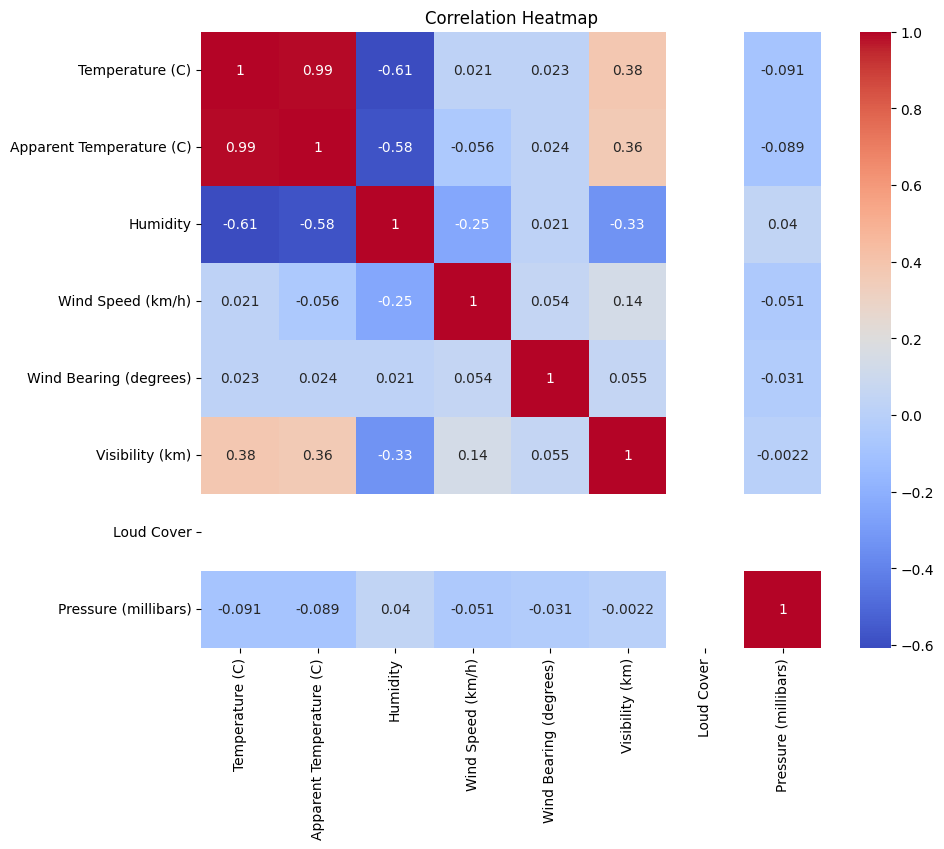

In [ ]:
#CORELATION HEATMAP

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

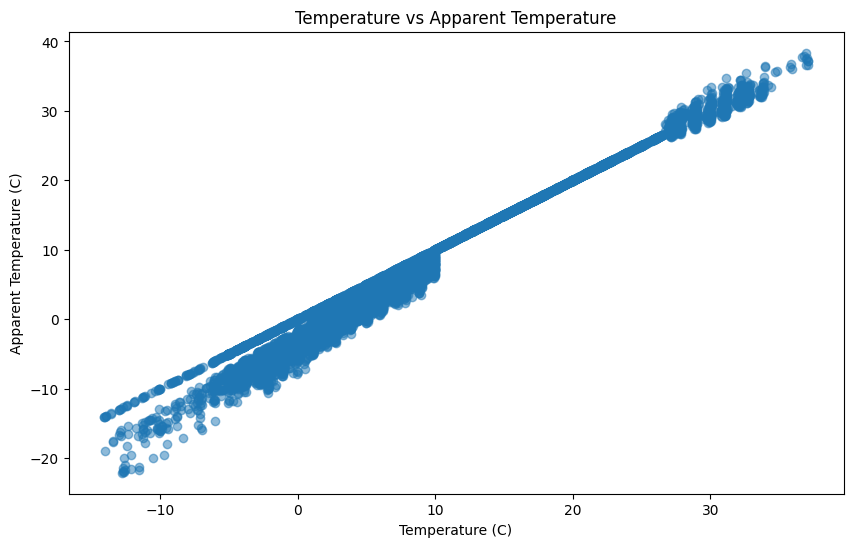

In [ ]:
#TEMPERATURE ANALYSIS

# Plot Temperature vs Apparent Temperature
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature (C)'], df['Apparent Temperature (C)'], alpha=0.5)
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [ ]:
#PRDECTIVE MODELLING

# Define features and target variable
X = numeric_df.drop(columns=['Apparent Temperature (C)'])
y = numeric_df['Apparent Temperature (C)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model=LinearRegression()
# Fit the Linear Regression model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (e.g., using R-squared, Mean Squared Error)
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")





R-squared: 0.9906888203604183
Mean Squared Error: 1.1230908595028595


In [ ]:
prediction = model.predict(X_test)
prediction

array([-1.9863919 , 21.53244298,  4.81013389, ..., 10.98377912,
       11.35408931, 23.82342044])

In [ ]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
accuracy=LR.score(X_test,y_test)
accuracy

0.9906888203604183

In [ ]:
cm=confusion_matrix=(y_test,y_pred)
cm

(3455     -2.327778
 8063     20.255556
 11615     4.744444
 2677     -5.200000
 6794      4.494444
            ...    
 11564    -1.283333
 6779     17.361111
 9034     12.266667
 549      12.194444
 10196    23.966667
 Name: Apparent Temperature (C), Length: 2460, dtype: float64,
 array([-1.9863919 , 21.53244298,  4.81013389, ..., 10.98377912,
        11.35408931, 23.82342044]))

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
classification_report=(y_test,y_pred)
print(classification_report)

(87206    28.827778
33421     7.988889
6807     14.400000
37340    -2.722222
3016     -2.672222
           ...    
94353     7.077778
56859    17.894444
9080     10.716667
47825    24.888889
43409    18.861111
Name: Apparent Temperature (C), Length: 19291, dtype: float64, array([28.68237401,  8.4116828 , 13.50671119, ...,  9.39414641,
       24.81111547, 18.03427106]))
